In [32]:
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Defining global frame length and hop length in samples
FRAME_LENGTH = 1024
HOP_LENGTH = 512

In [60]:
#PATHS
QUEEN_PATH = "/mnt/c/Users/Gaël de Brye/Desktop/Audio Signal Processing/EVALUATION_FINALE/Data/ODF_Kaggle/AOBTD_Queen_intro.wav"

music1='cut_super-nana'
music2='Shostakovich_Waltz_IncreasingTempo'
music3='DrumLoop_72bpm'
music4='BIB_ACDC_intro'
PATH1=os.path.join("/mnt/c/Users/Gaël de Brye/Desktop/Audio Signal Processing/EVALUATION_FINALE/Data/Cut",f'{music1}.wav')
PATH2=os.path.join("/mnt/c/Users/Gaël de Brye/Desktop/Audio Signal Processing/EVALUATION_FINALE/Data/ODF_Kaggle",f'{music2}.wav')
PATH3=os.path.join("/mnt/c/Users/Gaël de Brye/Desktop/Audio Signal Processing/EVALUATION_FINALE/Data/ODF_Kaggle",f'{music3}.wav')
PATH3=os.path.join("/mnt/c/Users/Gaël de Brye/Desktop/Audio Signal Processing/EVALUATION_FINALE/Data/ODF_Kaggle",f'{music4}.wav')

In [35]:
# Waveform:
def load_sound(PATH):
    
    signal, sr = librosa.load(PATH)
    
    # Log spectrogram:
    spec = librosa.stft(signal)
    log_spec = librosa.amplitude_to_db(np.abs(spec))
    return signal, sr, log_spec

In [36]:
def Plot_waveform_spec(signal, sr):
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(signal, alpha=0.5, color='blue')
    plt.title('Waveform')
    
    plt.subplot(2, 1, 2)
    librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='log')
    plt.title('Spectrogram')
    
    plt.show()

In [46]:
# Calculate log(1 + x)
def RMSE(signal, FRAME_LENGTH, HOP_LENGTH, sr):
    rmse = librosa.feature.rms(y=signal, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH).flatten()
    frames = np.arange(len(rmse))
    t = librosa.frames_to_time(frames, sr=sr)
    log_rmse = np.log1p(10*rmse)
    log_rmse_diff = np.zeros_like(log_rmse)
    log_rmse_diff[1:] = np.diff(log_rmse)
    log_energy_novelty = np.max([np.zeros_like(log_rmse_diff), log_rmse_diff], axis=0)
    return log_rmse, log_energy_novelty, t

In [38]:
signal, sr, log_spec = load_sound(QUEEN_PATH)
ipd.Audio(QUEEN_PATH)

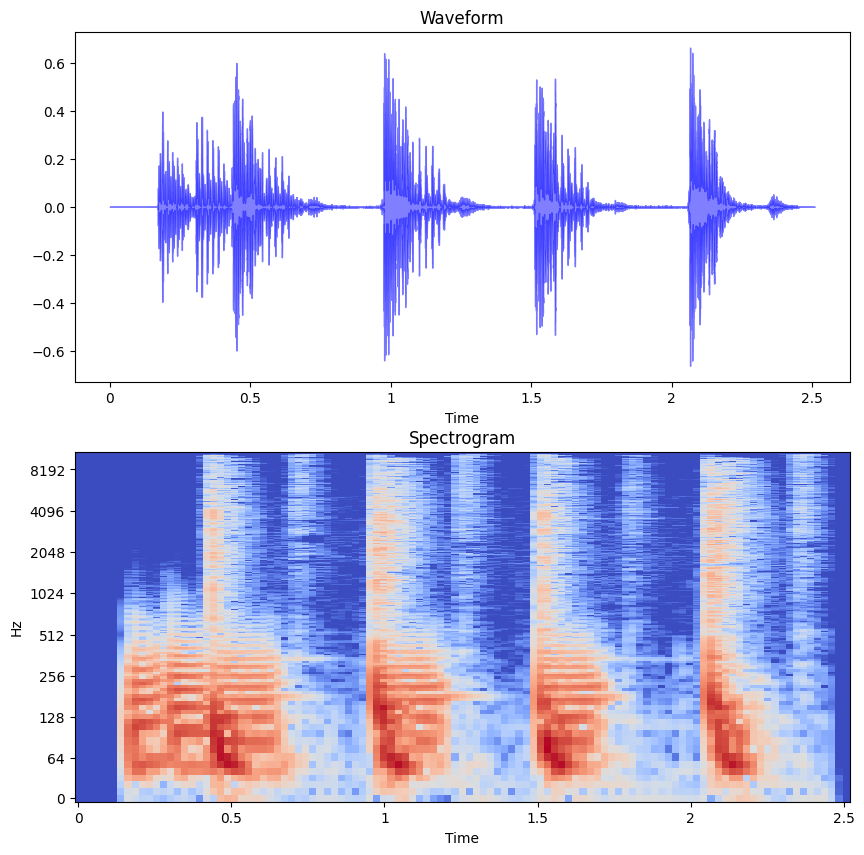

In [39]:
Plot_waveform_spec(signal,sr)

In [47]:
log_rmse, log_energy_novelty, t=RMSE(signal, FRAME_LENGTH, HOP_LENGTH, sr)

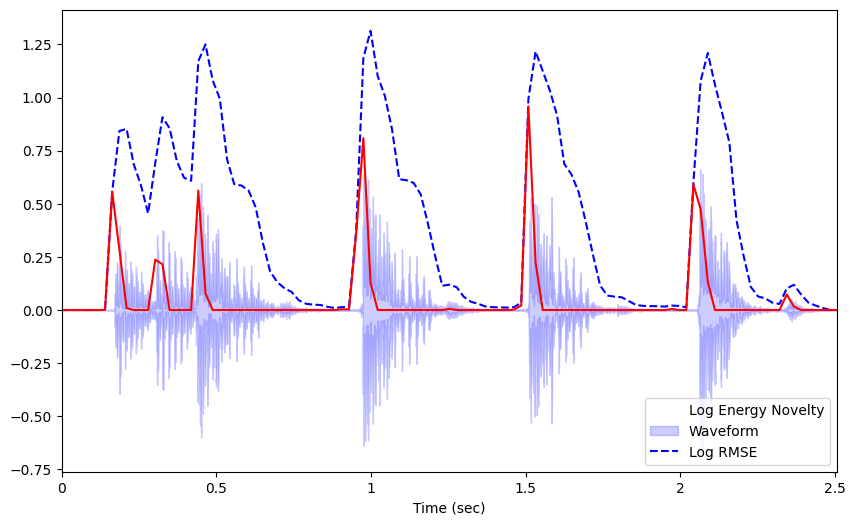

In [41]:
plt.figure(figsize=(10, 6))
librosa.display.waveshow(signal, alpha=0.2,color='blue')
plt.plot(t, log_rmse, 'b--', t, log_energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(( 'Log Energy Novelty','Waveform', 'Log RMSE'))
plt.show()

In [48]:
# Onset detection
onset_frames = librosa.onset.onset_detect(
    y=signal,
    sr=sr,
    hop_length=HOP_LENGTH
)

onset_times = librosa.frames_to_time(onset_frames)
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=HOP_LENGTH)

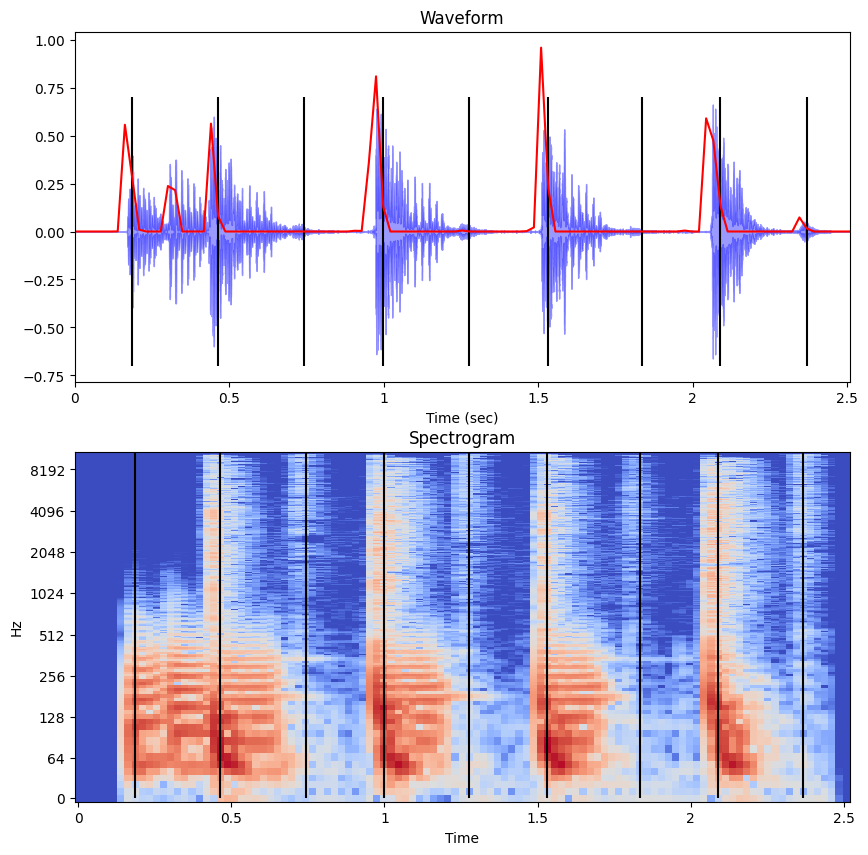

In [51]:
plt.figure(figsize=(10, 10))

# Plot onsets on the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, alpha=0.4,color='blue')
plt.vlines(onset_times, -0.7, 0.7, color="k")
plt.title('Waveform')
plt.plot( t, log_energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')

# Plot onsets on the spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 12000, color="k")
plt.title('Spectrogram')

plt.show()

In [44]:
click_track = librosa.clicks(frames=onset_frames, sr=sr, length=len(signal))
ipd.Audio(signal + click_track, rate=sr)

Maintenant, essayons la même méthode sur d'autres morceaux 

In [52]:
PATH=PATH1
signal, sr, log_spec = load_sound(PATH)
ipd.Audio(PATH)

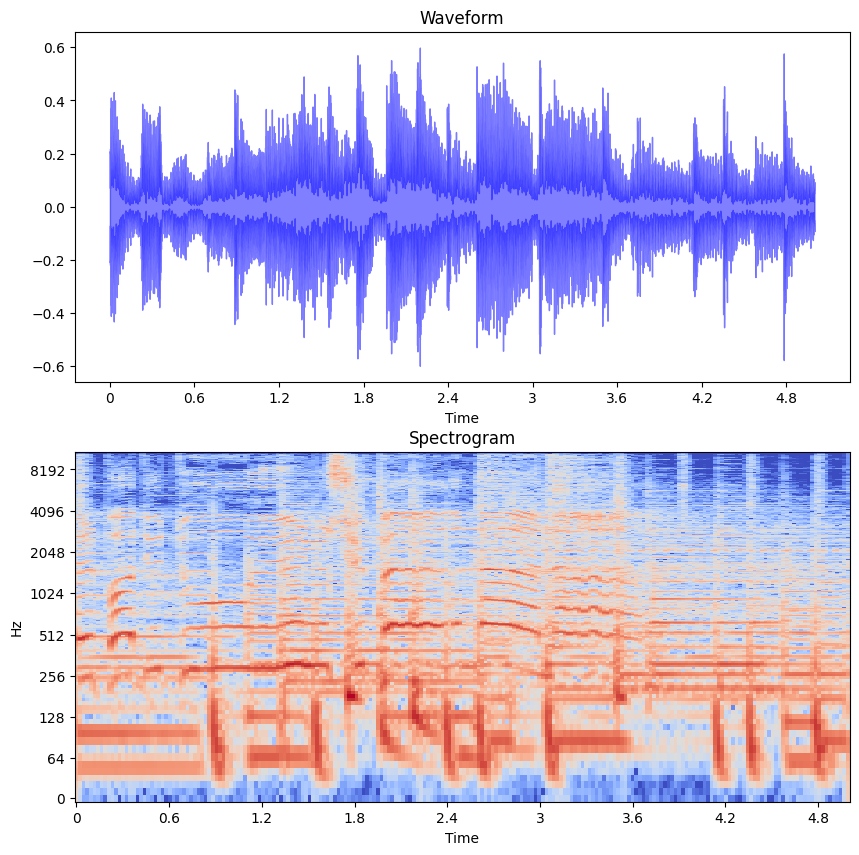

In [53]:
Plot_waveform_spec(signal,sr)

In [54]:
log_rmse, log_energy_novelty, t=RMSE(signal, FRAME_LENGTH, HOP_LENGTH, sr)

In [55]:
# Onset detection
onset_frames = librosa.onset.onset_detect(
    y=signal,
    sr=sr,
    hop_length=HOP_LENGTH
)

onset_times = librosa.frames_to_time(onset_frames)
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=HOP_LENGTH)

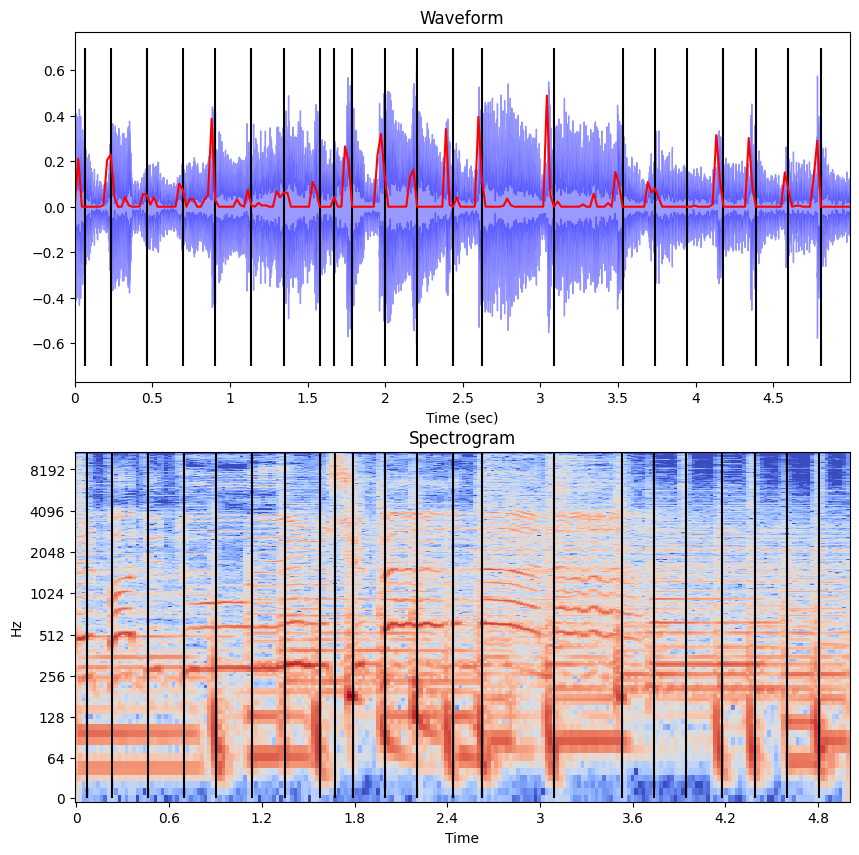

In [56]:
plt.figure(figsize=(10, 10))

# Plot onsets on the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, alpha=0.4,color='blue')
plt.vlines(onset_times, -0.7, 0.7, color="k")
plt.title('Waveform')
plt.plot( t, log_energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')

# Plot onsets on the spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 12000, color="k")
plt.title('Spectrogram')

plt.show()

In [65]:
PATH=PATH2
signal, sr, log_spec = load_sound(PATH)
log_rmse, log_energy_novelty, t=RMSE(signal, FRAME_LENGTH, HOP_LENGTH, sr)
ipd.Audio(PATH)

In [66]:
# Onset detection
onset_frames = librosa.onset.onset_detect(
    y=signal,
    sr=sr,
    hop_length=HOP_LENGTH
)

onset_times = librosa.frames_to_time(onset_frames)
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=HOP_LENGTH)

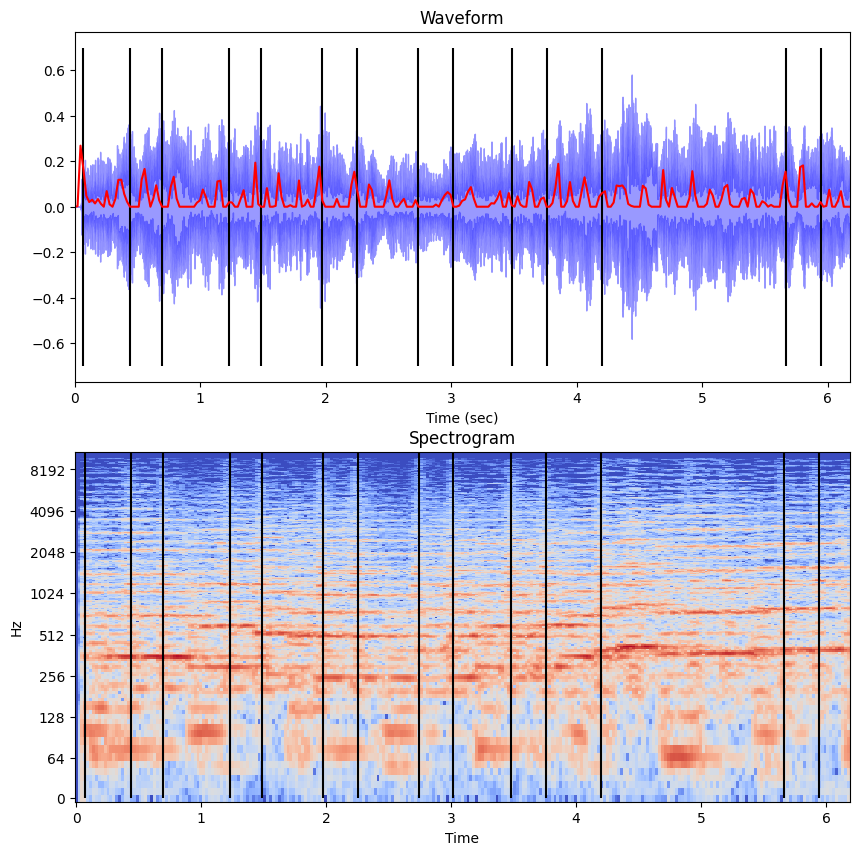

In [67]:
plt.figure(figsize=(10, 10))

# Plot onsets on the waveform
plt.subplot(2, 1, 1)
librosa.display.waveshow(signal, alpha=0.4,color='blue')
plt.vlines(onset_times, -0.7, 0.7, color="k")
plt.title('Waveform')
plt.plot( t, log_energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')

# Plot onsets on the spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(log_spec, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 12000, color="k")
plt.title('Spectrogram')

plt.show()